In [1]:
import sys
sys.path.append('../ppo_negotiation_simplified/')
import helpers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
envs = helpers.create_envs(yamls_filename='yamls/2_region_yamls')
agents = helpers.create_agents(envs[0])

In [3]:
random_rewards = envs[0].estimate_reward_distribution()

100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 30.76it/s]


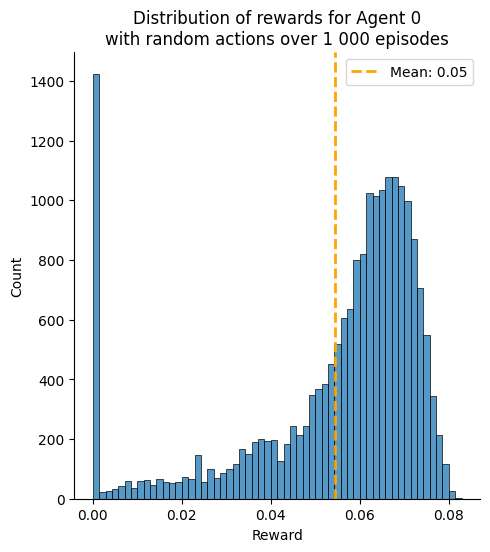

In [4]:
agent_id = 0
mean = np.mean(random_rewards[:, agent_id])
sns.displot(random_rewards[:, agent_id])
plt.axvline(mean, color = 'orange', linestyle = '--', linewidth = 2, label = 'Mean: {:.2f}'.format(mean))
plt.title(f'Distribution of rewards for Agent {agent_id}\nwith random actions over 1 000 episodes')
plt.xlabel('Reward')
plt.legend()
plt.show()

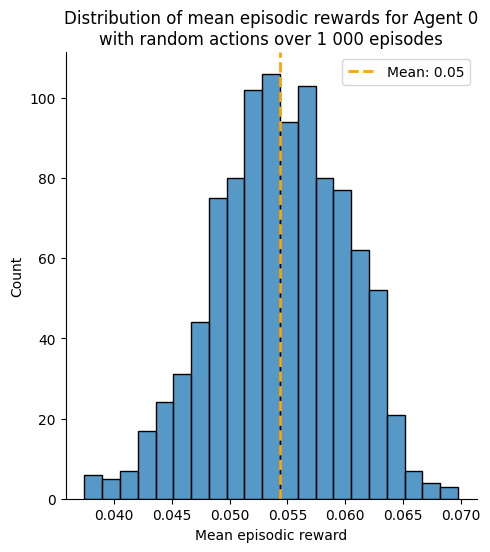

In [5]:
agent_id = 0
mean_random_reward_per_episode = random_rewards[:, agent_id].reshape(20, -1).mean(0)
mean = np.mean(mean_random_reward_per_episode)
sns.displot(mean_random_reward_per_episode)
plt.axvline(mean, color = 'orange', linestyle = '--', linewidth = 2, label = 'Mean: {:.2f}'.format(mean))
plt.title(f'Distribution of mean episodic rewards for Agent {agent_id}\nwith random actions over 1 000 episodes')
plt.xlabel('Mean episodic reward')
plt.legend()
plt.show()

In [6]:
stoch_no_comm, det_no_comm = helpers.train(agents, envs, epochs = 30, batch_size=50, with_comm = True)

100%|███████████████████████████████████████████| 30/30 [19:36<00:00, 39.20s/it]


<Axes: >

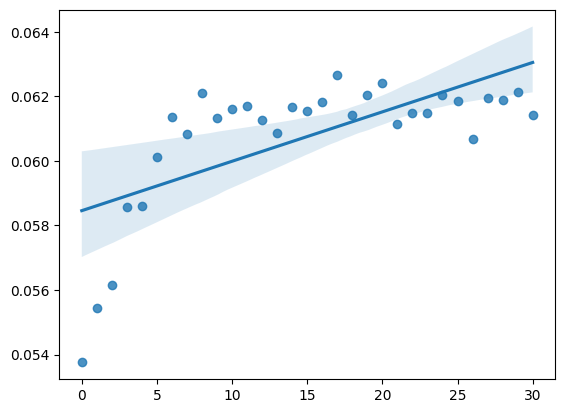

In [9]:
sns.regplot(x = np.arange(stoch_no_comm.shape[0]), y = stoch_no_comm[:, 0])

In [10]:
helpers.eval_agents_det(agents, envs[0])

array([0.06788134, 0.06676079])

In [13]:
np.prod(envs[0].global_negotiation_state['decisions'].shape)

42